<a href="https://colab.research.google.com/github/tavares51/tcc_data_science/blob/main/analise_dos_dados.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Medical Student Mental Health**
<br>
*Burnout, Anxiety and Depression*

In [1]:
import pandas as pd
import numpy as np
import plotly.express as px

In [44]:
code_book = pd.read_csv('dados/codebook.csv', sep = ";")

In [45]:
code_book.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Variable Name   20 non-null     object 
 1   Variable Label  20 non-null     object 
 2   Variable Scale  19 non-null     object 
 3   Unnamed: 3      0 non-null      float64
 4   Unnamed: 4      0 non-null      float64
 5   Unnamed: 5      0 non-null      float64
dtypes: float64(3), object(3)
memory usage: 1.1+ KB


In [46]:
code_book[['Variable Name', 'Variable Label', 'Variable Scale']]

,Variable Name,Variable Label,Variable Scale
0,id,Participants ID number,string
1,age,age at questionnaire 20-21,numeric
2,year,CURICULUM YEAR : In which curriculum year are ...,1=Bmed1; 2=Bmed2; 3=Bmed3; 4=Mmed1; 5=Mmed2; 6...
3,sex,GENDER : To which gender do you identify the m...,1=Man; 2=Woman; 3=Non-binary
4,glang,MOTHER TONGUE: What is your mother tongue?,1=French; 15=German; 20=English; 37=Arab; 51=B...
5,part,PARTNERSHIP STATUS : Do you have a partner?,0=No; 1=Yes
6,job,HAVING A JOB : Do you have a paid job?,0=No; 1=Yes
7,stud_h,"HOURS OF STUDY PER WEEK : On average, how many...",NaN
8,health,SATISFACTION WITH HEALTH : How satisfied are y...,1=Verydissatisfied; 2=Dissatisfied; 3=Neithers...
9,psyt,PSYCHOTHERAPY LAST YEAR : During the last 12 m...,0=No; 1=Yes


In [50]:
df = pd.read_csv('dados/data_carrard.csv')

In [51]:
df.head()

,id,age,year,sex,glang,part,job,stud_h,health,psyt,jspe,qcae_cog,qcae_aff,amsp,erec_mean,cesd,stai_t,mbi_ex,mbi_cy,mbi_ea
0,2,18,1,1,120,1,0,56,3,0,88,62,27,17,0.738095,34,61,17,13,20
1,4,26,4,1,1,1,0,20,4,0,109,55,37,22,0.690476,7,33,14,11,26
2,9,21,3,2,1,0,0,36,3,0,106,64,39,17,0.690476,25,73,24,7,23
3,10,21,2,2,1,0,1,51,5,0,101,52,33,18,0.833333,17,48,16,10,21
4,13,21,3,1,1,1,0,22,4,0,102,58,28,21,0.690476,14,46,22,14,23


In [54]:
df.rename(columns=
    {'age':'idade'
    ,'sex':'sexo'
    ,'year':'ano_graducao'
    ,'glang':'idioma'
    ,'part':'relacionamento'
    ,'job':'trabalha'
    ,'stud_h':'horas_estudo'
    ,'health':'satisfacao_saude'
    ,'psyt':'terapia_ultimo_ano'
    ,'jspe':'nivel_empatia'
    ,'qcae_cog':'empatia_cognitiva'
    ,'qcae_aff':'empatia_afectiva'
    ,'amsp':'motivacao_academica'
    ,'erec_mean':'nivel_medio_empatia'
    ,'cesd':'escala_depressao'
    ,'stai_t':'escala_ansiedade'
    ,'mbi_ex':'burnout_exaustao'
    ,'mbi_cy':'burnout_cinismo'
    ,'mbi_ea':'burnout_eficacia_prof'}
    , inplace=True)

In [55]:
df.describe()

,id,idade,ano_graducao,sexo,idioma,relacionamento,trabalha,horas_estudo,satisfacao_saude,terapia_ultimo_ano,nivel_empatia,empatia_cognitiva,empatia_afectiva,motivacao_academica,nivel_medio_empatia,escala_depressao,escala_ansiedade,burnout_exaustao,burnout_cinismo,burnout_eficacia_prof
count,886.000000,886.000000,886.000000,886.000000,886.000000,886.000000,886.000000,886.000000,886.000000,886.000000,886.000000,886.000000,886.000000,886.000000,886.000000,886.000000,886.000000,886.000000,886.000000,886.000000
mean,889.709932,22.383747,3.102709,1.695260,14.327314,0.563205,0.348758,25.288939,3.777652,0.224605,106.374718,58.525959,34.784424,23.150113,0.720144,18.050790,42.898420,16.878104,10.079007,24.207675
std,515.555875,3.300664,1.763937,0.472665,32.366389,0.496269,0.476847,15.927875,1.061497,0.417558,8.784012,6.570341,5.377062,4.993220,0.093570,11.478731,11.978458,5.256025,4.592609,4.633675
min,2.000000,17.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,67.000000,37.000000,18.000000,6.000000,0.357143,0.000000,20.000000,5.000000,4.000000,10.000000
25%,447.500000,20.000000,1.000000,1.000000,1.000000,0.000000,0.000000,12.000000,3.000000,0.000000,101.000000,54.000000,31.000000,20.000000,0.666667,9.000000,34.000000,13.000000,6.000000,21.000000
50%,876.000000,22.000000,3.000000,2.000000,1.000000,1.000000,0.000000,25.000000,4.000000,0.000000,107.000000,58.000000,35.000000,23.000000,0.726190,16.000000,43.000000,17.000000,9.000000,24.000000
75%,1341.750000,24.000000,5.000000,2.000000,1.000000,1.000000,1.000000,36.000000,5.000000,0.000000,113.000000,63.000000,39.000000,26.750000,0.785714,25.000000,51.000000,20.000000,13.000000,28.000000
max,1790.000000,49.000000,6.000000,3.000000,121.000000,1.000000,1.000000,70.000000,5.000000,1.000000,125.000000,76.000000,48.000000,35.000000,0.952381,56.000000,77.000000,30.000000,24.000000,36.000000


In [56]:
df.head()

,id,idade,ano_graducao,sexo,idioma,relacionamento,trabalha,horas_estudo,satisfacao_saude,terapia_ultimo_ano,nivel_empatia,empatia_cognitiva,empatia_afectiva,motivacao_academica,nivel_medio_empatia,escala_depressao,escala_ansiedade,burnout_exaustao,burnout_cinismo,burnout_eficacia_prof
0,2,18,1,1,120,1,0,56,3,0,88,62,27,17,0.738095,34,61,17,13,20
1,4,26,4,1,1,1,0,20,4,0,109,55,37,22,0.690476,7,33,14,11,26
2,9,21,3,2,1,0,0,36,3,0,106,64,39,17,0.690476,25,73,24,7,23
3,10,21,2,2,1,0,1,51,5,0,101,52,33,18,0.833333,17,48,16,10,21
4,13,21,3,1,1,1,0,22,4,0,102,58,28,21,0.690476,14,46,22,14,23


In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 886 entries, 0 to 885
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     886 non-null    int64  
 1   idade                  886 non-null    int64  
 2   ano_graducao           886 non-null    int64  
 3   sexo                   886 non-null    int64  
 4   idioma                 886 non-null    int64  
 5   relacionamento         886 non-null    int64  
 6   trabalha               886 non-null    int64  
 7   horas_estudo           886 non-null    int64  
 8   satisfacao_saude       886 non-null    int64  
 9   terapia_ultimo_ano     886 non-null    int64  
 10  nivel_empatia          886 non-null    int64  
 11  empatia_cognitiva      886 non-null    int64  
 12  empatia_afectiva       886 non-null    int64  
 13  motivacao_academica    886 non-null    int64  
 14  nivel_medio_empatia    886 non-null    float64
 15  escala

### Idades

In [58]:
age = df['idade'].value_counts()

In [59]:
ax_age = px.bar(x = age.index, y = age.values, title='Idades dos Alunos', labels={'x':'Idade', 'y':'Quantidade'}, width=950
,height=500, text_auto=True)
ax_age

### Gênero

In [60]:
df['sexo_desc'] = df['sexo'].map({1:'Masculino', 2:'Feminino', 3:'Nao_Binario'})

In [61]:
sex = df['sexo_desc'].value_counts()

In [62]:
ax_sex = px.bar(x = sex.index, y = sex.values, title='Gênero dos Alunos', labels={'x':'Gênero', 'y':'Quantidade'}, width=950
,height=500, text_auto=True, color = sex.index)
ax_sex

In [63]:
import plotly.figure_factory as ff

numerical_df = df.select_dtypes(include=['number'])

corr = numerical_df.corr()
fig = ff.create_annotated_heatmap(
    z=corr.values,
    x=list(corr.columns),
    y=list(corr.index),
    annotation_text=corr.round(2).values,
    showscale=True
)
fig.show()

Váriaveis de saída que iremos analisar: escala_depressao, burnout_exaustao, escala_ansiedade

In [64]:
target_vars = ['escala_depressao', 'burnout_exaustao', 'escala_ansiedade']

for target in target_vars:
  correlations = corr[target].sort_values(ascending=False)
  correlations = correlations.drop(target)
  top_5 = correlations.head(5)

  print(f"Top 5 variáveis mais correlacionadas com {target}:")
  print(top_5)
  print("\n")


Top 5 variáveis mais correlacionadas com escala_depressao:
escala_ansiedade      0.715728
burnout_exaustao      0.605617
burnout_cinismo       0.407727
terapia_ultimo_ano    0.268491
empatia_afectiva      0.250947
Name: escala_depressao, dtype: float64


Top 5 variáveis mais correlacionadas com burnout_exaustao:
escala_depressao    0.605617
escala_ansiedade    0.530486
burnout_cinismo     0.505200
empatia_afectiva    0.215886
horas_estudo        0.185804
Name: burnout_exaustao, dtype: float64


Top 5 variáveis mais correlacionadas com escala_ansiedade:
escala_depressao      0.715728
burnout_exaustao      0.530486
burnout_cinismo       0.331884
empatia_afectiva      0.331350
terapia_ultimo_ano    0.293282
Name: escala_ansiedade, dtype: float64




# Análise Exploratoria: 5 variáveis mais correlacionadas *Depressão*

In [65]:
vars_interesse = ['escala_ansiedade', 'burnout_exaustao', 'burnout_cinismo', 'terapia_ultimo_ano', 'empatia_afectiva']
df_interesse = df[vars_interesse]

**Estatísticas descritivas**

In [66]:
print(df_interesse.describe())

       escala_ansiedade  burnout_exaustao  burnout_cinismo  \
count        886.000000        886.000000       886.000000   
mean          42.898420         16.878104        10.079007   
std           11.978458          5.256025         4.592609   
min           20.000000          5.000000         4.000000   
25%           34.000000         13.000000         6.000000   
50%           43.000000         17.000000         9.000000   
75%           51.000000         20.000000        13.000000   
max           77.000000         30.000000        24.000000   

       terapia_ultimo_ano  empatia_afectiva  
count          886.000000        886.000000  
mean             0.224605         34.784424  
std              0.417558          5.377062  
min              0.000000         18.000000  
25%              0.000000         31.000000  
50%              0.000000         35.000000  
75%              0.000000         39.000000  
max              1.000000         48.000000  


**Histogramas**

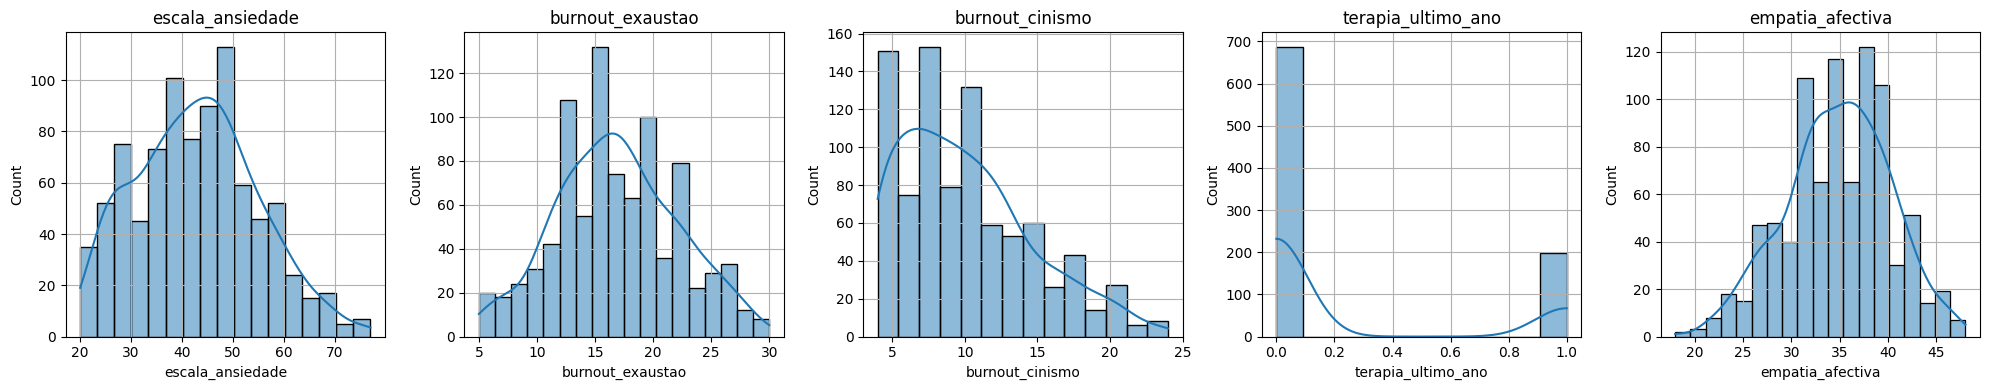

In [67]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(1, len(vars_interesse), figsize=(20, 4))

for i, var in enumerate(vars_interesse):
  sns.histplot(df_interesse[var], ax=axes[i], kde=True)
  axes[i].set_title(var)
  axes[i].grid(True)

plt.tight_layout()
plt.show()

**Boxplots**

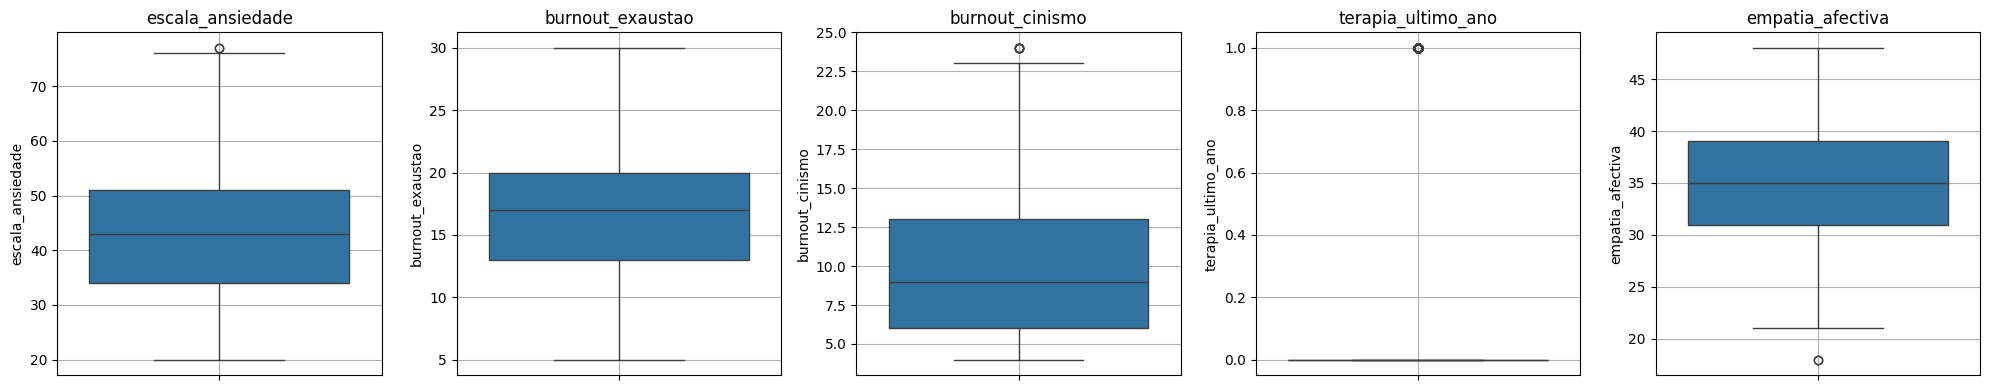

In [69]:
import matplotlib.pyplot as plt
fig, axes = plt.subplots(1, len(vars_interesse), figsize=(20, 4))

for i, var in enumerate(vars_interesse):
  sns.boxplot(y=df_interesse[var], ax=axes[i])
  axes[i].set_title(var)
  axes[i].grid(True)

plt.tight_layout()
plt.show()


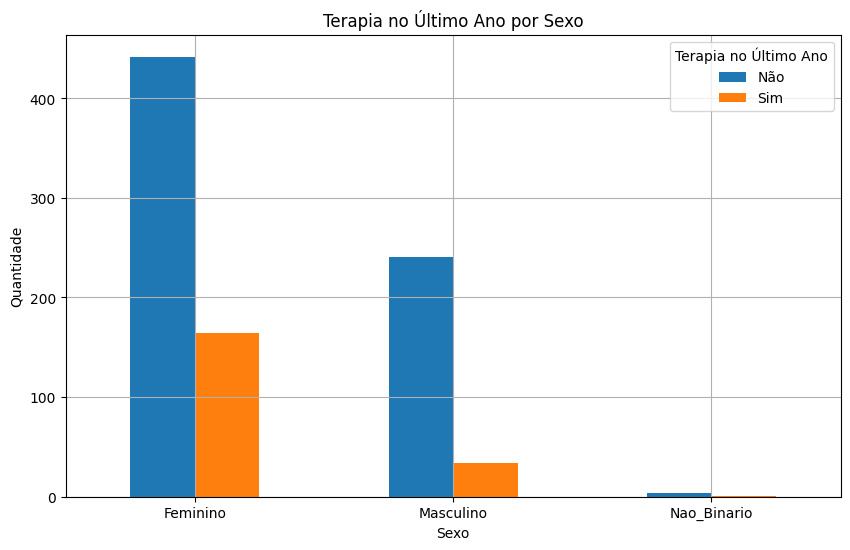

In [72]:
import matplotlib.pyplot as plt
terapia_sexo = df.groupby(['sexo_desc', 'terapia_ultimo_ano'])['sexo_desc'].count().unstack().fillna(0)

terapia_sexo.plot(kind='bar', figsize=(10, 6))
plt.title('Terapia no Último Ano por Sexo')
plt.xlabel('Sexo')
plt.ylabel('Quantidade')
plt.xticks(rotation=0)
plt.legend(title='Terapia no Último Ano', labels=['Não', 'Sim'])
plt.grid(True)
plt.show()
